<a href="https://colab.research.google.com/github/lstarke/panorama-covid/blob/main/Panorama_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o COVID-19

De acordo com o monistério da saúde a Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global.

O SARS-CoV-2 é um betacoronavírus descoberto em amostras de lavado broncoalveolar obtidas de pacientes com pneumonia de causa desconhecida na cidade de Wuhan, província de Hubei, China, em dezembro de 2019. Pertence ao subgênero Sarbecovírus da família Coronaviridae e é o sétimo coronavírus conhecido a infectar seres humanos.

Os coronavírus são uma grande família de vírus comuns em muitas espécies diferentes de animais, incluindo o homem, camelos, gado, gatos e morcegos. Raramente os coronavírus de animais podem infectar pessoas e depois se espalhar entre seres humanos como já ocorreu com o MERS-CoV e o SARS-CoV-2. Até o momento, não foi definido o reservatório silvestre do SARS-CoV-2.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

A maioria das pessoas que adoece em decorrência da COVID-19 apresenta sintomas leves a moderados e se recupera sem tratamento especial. No entanto, algumas desenvolvem um quadro grave e precisam de atendimento médico.

Aproximadamente 80% dos pacientes que apresentam sintomas se recuperam da doença sem precisar de tratamento hospitalar; 15% ficam gravemente doentes e precisam de oxigênio e 5% ficam gravemente doentes e precisam de cuidados intensivos.

As complicações que levam à morte podem incluir insuficiência respiratória, síndrome do desconforto respiratório agudo, formação de coágulos nos vasos sanguíneos, infecção generalizada, insuficiência de múltiplos órgãos, incluindo lesão do coração, fígado ou rins.

Em raras situações, as crianças podem desenvolver uma síndrome inflamatória grave algumas semanas após a infecção.


Fonte:
* [Ministério da Saúde](https://www.gov.br/saude/pt-br/coronavirus/o-que-e-o-coronavirus)
* [Biblioteca Virtual em Saúde
MINISTÉRIO DA SAÚDE](https://bvsms.saude.gov.br/covid-19-2/)





# Instalação de bibliotecas

In [192]:
# instalação do pacote wget para baixar os dados dos repositório da Our World in Data no Github
# !pip install wget
# !pip install humanize

# Importação da bibliotecas utilizadas

In [193]:
import pandas as pd 
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from collections import OrderedDict
from datetime import datetime, timedelta
from humanize import intword, intcomma

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Download dos datasets

In [194]:
# !wget -P / https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv
# !wget -P / https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv

# Carregando o dataset

In [195]:
df = pd.read_csv("/content/owid-covid-data.csv", sep=",")

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


# Dimensões do dataframe

In [196]:
print(f"qtde linhas, qtde colunas = {df.shape}")

qtde linhas, qtde colunas = (215171, 67)


# Verificando o tipo das variáveis

In [197]:
df.dtypes

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

# Dicionário de Variáveis

Para facilitar a visualização das variáveis, as mesmas foram separadas por categoria seguindo  as orientações do codebook disponibilizado.

Categoria: **Confirmed cases**

| Variável                       | Descrição                                                        |
|--------------------------------:|------------------------------------------------------------------|
|                    total_cases | Total de casos confirmados de COVID-19                           |
|                      new_cases | Novos casos confirmados de COVID-19                              |
|             new_cases_smoothed | Médias móvel de 7 dias de novos casos confirmados                |
|        total_cases_per_million | Total de casos confirmados de COVID-19 por milhão de pessoas     |
|          new_cases_per_million | Novos casos confirmados de COVID-19 por milhão de pessoas        |
| new_cases_smoothed_per_million | Média móvel de 7 dias de casos confirmados por milhão de pessoas |

Categoria: **Confirmed deaths**

| Variável                        | Descrição                                                               |
|---------------------------------:|-------------------------------------------------------------------------|
| total_deaths                    | Total de mortes por COVID-19                                            |
| new_deaths                      | Novas mortes por COVID-19                                               |
| new_deaths_smoothed             | Média móvel (7 dias) de novas mortes por COVID-19                       |
| total_deaths_per_million        | Total de mortes por COVID-19 por milhão de pessoas                      |
| new_deaths_per_million          | Novas mortes por COVID-19 por milhão de pessoas                         |
| new_deaths_smoothed_per_million | Média móvel (7 dias) de novas mortes por COVID-19 por milhão de pessoas |

Categoria: **Excess mortality**

| Variável                                | Descrição                                                                                                                                                                                                        |
|-----------------------------------------:|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| excess_mortality                        | Diferença percentual entre o número reportado de mortes semanal ou mensalmente em 2020-2021 e o número projetado com base em anos anteriores                                                                     |
| excess_mortality_cumulative             | Diferença percentual entre o acumulado de mortes desde Janeiro de 2020 e o acumulo projetado de mortes para o mesmo período baseados nos anos anterioresidem anterior, sendo que acumulado desde Janeiro de 2020 |
| excess_mortality_cumulative_absolute    | Diferença acumulada (em números absolutos) entre as mortes reportadas desde Janeiro de 2020 e o número projetado de mortes para o mesmo período baseado nos anos anteriores                                                             |
| excess_mortality_cumulative_per_million | Diferença acumulada entre as mortes reportadas desde Janeiro de 2020 e o número projetado de mortes para o mesmo período baseado nos anos anteriores por milhão de pessoas                                       |

Categoria: **Hospital & ICU**

| Variável                           | Descrição                                                                                                                  |
|------------------------------------:|----------------------------------------------------------------------------------------------------------------------------|
| icu_patients                       | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um dado dia                                     |
| icu_patients_per_million           | Número de pacientes com COVID-19 em unidades de terapia intensiva (UTI) em um dado dia por milhão de pessoas               |
| hosp_patients                      | Número de pacientes com COVID-19 hospitalizados em um dado dia                                                             |
| hosp_patients_per_million          | Número de pacientes com COVID-19 hospitalizados em um dado dia por milhão de pessoas                                       |
| weekly_icu_admissions              | Número de pacientes com COVID-19 admitidos em unidades de terapia intensiva (UTI) em uma dada semana                       |
| weekly_icu_admissions_per_million  | Número de pacientes com COVID-19 admitidos em unidades de terapia intensiva (UTI) em uma dada semana por milhão de pessoas |
| weekly_hosp_admissions             | Número de pacientes com COVID-19 hospitalizados em uma dada semana                                                         |
| weekly_hosp_admissions_per_million | Número de pacientes com COVID-19 hospitalizados em uma dada semana por milhão de pessoas                                   |


Categoria: **Outros**

| Variável                   | Descrição                                                                                                                      |
|----------------------------:|--------------------------------------------------------------------------------------------------------------------------------|
| iso_code                   | Código de 3 letras para o país definido de acordo com a ISO 3166-1 alfa-3                                                      |
| continent                  | Continente do país ou região                                                                                                   |
| location                   | Nome do país ou região                                                                                                         |
| date                       | Data da observação                                                                                                             |
| population                 | População em 2020                                                                                                              |
| population_density         | Número de pessoas dividido pela área terrestre, medido em quilômetros quadrados, para o ano mais recente disponível            |
| median_age                 | Mediana da idade da população de acordo com projeção da ONU para 2020                                                          |
| aged_65_older              | Parcela da população com 65 anos ou mais, considerando o ano mais recente disponível                                           |
| aged_70_older              | Parcela da população com 70 anos ou mais em 2015                                                                               |
| gdp_per_capita             | Produto interno bruto per capita para o ano mais recente disponível                                                            |
| extreme_poverty            | Parcela da população que vive em pobreza extrema, para o ano mais recente disponível desde 2010                                |
| cardiovasc_death_rate      | Taxa de mortalidade por doenças cardiovasculares em 2017 (número anual de mortes por 100.000 pessoas)                          |
| diabetes_prevalence        | Prevalência de diabetes (% da população de 20 a 79 anos) em 2017                                                               |
| female_smokers             | Parcela de mulheres que fumam, ano mais recente disponível                                                                     |
| male_smokers               | Parcela de homens que fumam, ano mais recente disponível                                                                       |
| handwashing_facilities     | Parcela da população com instalações básicas para lavagem das mãos, ano mais recente disponível                                |
| hospital_beds_per_thousand | Leitos hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010                                                  |
| life_expectancy            | Expectativa de vida ao nascer em 2019                                                                                          |
| human_development_index    | Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano: uma vida longa e saudável, |
|                            | conhecimento e um padrão de vida decente. Valores para 2019                                                                    |

Categoria: **Policy responses**

| Variável         | Descrição                                                                                          |
|------------------:|----------------------------------------------------------------------------------------------------|
| stringency_index | Índice de Restrição de Resposta do Governo: medida composta com base em 9 indicadores de resposta, |
|                  | incluindo fechamentos de escolas, fechamentos de locais de trabalho e proibições de viagens,       |
|                  | redimensionado para um valor de 0 a 100 (100 = muito rigoroso)                                     |

Categoria: **Reproduction rate**

| Variável          | Descrição                                                         |
|-------------------:|-------------------------------------------------------------------|
| reproduction_rate | Taxa de reprodução (R) efetiva estimada em tempo real do COVID-19 |

Categoria: **Tests & positivity**

| Variável                        | Descrição                                                                                                                            |
|---------------------------------:|--------------------------------------------------------------------------------------------------------------------------------------|
| total_tests                     | Total de testes para COVID-19                                                                                                        |
| new_tests                       | Novos testes para COVID-19 (calculado somente para dias consecutivos)                                                                |
| total_tests_per_thousand        | Total de testes para COVID-19 a cada mil pessoas                                                                                     |
| new_tests_per_thousand          | Novos testes para COVID-19 a cada mil pessoas                                                                                        |
| new_tests_smoothed              | Média móvel (7 dias) novos testes para COVID-19                                                                                      |
| new_tests_smoothed_per_thousand | Média móvel (7 dias) novos testes para COVID-19 a cada mil pessoas                                                                   |
| positive_rate                   | Parcela de testes de COVID-19 que deram resultado positivo, dado uma média móvel de 7 dias (é o inverso da variável tests_per_case)) |
| tests_per_case                  | Testes conduzidos por novos casos confirmados de COVID-19, dado uma média móvel de 7 dias (é o inverso de positive_rate))            |
| tests_units                     | Unidade utilizada pela localidade que reportou os dados de teste                                                                     |

Categoria: **Vaccinations**

| Variável                                   | Descrição                                                                                                             |
|--------------------------------------------:|-----------------------------------------------------------------------------------------------------------------------|
| total_vaccinations                         | Total de vacinas administradas                                                                                        |
| people_vaccinated                          | Total de pessoas que receberam pelo menos uma dose da vacina                                                          |
| people_fully_vaccinated                    | Total de pessoas que receberam todas as doses prescritas pelos protocolos de vacinação                                |
| total_boosters                             | Número de doses administradas além das previstas no protocolo inicial de vacinação (doses de reforço)                 |
| new_vaccinations                           | Novas doses de vacinas administradas (contado apenas para dias consecutivos)                                          |
| new_vaccinations_smoothed                  | Novas doses de vacinas administradas (média móvel de 7 dias)                                                          |
| total_vaccinations_per_hundred             | Quantidade de doses administradas por 100 pessoas                                                                     |
| people_vaccinated_per_hundred              | Total de pessoas que receberam pelo menos uma dose da vacina por 100 pessoas                                          |
| people_fully_vaccinated_per_hundred        | Total de pessoas que receberam todas as doses preescritas pelo protocolo de vacinação por 100 pessoas                 |
| total_boosters_per_hundred                 | Número de doses administradas além das previstas no protocolo inicial de vacinação (doses de reforço) por 100 pessoas |
| new_vaccinations_smoothed_per_million      | Novas doses de vacina administradas (média móvel de 7 dias) por milhão de pessoas                                     |
| new_people_vaccinated_smoothed             | Número de pessoas recebendo sua primeira dose (média móvel de 7 dias)                                                 |
| new_people_vaccinated_smoothed_per_hundred | Número de pessoas recebendo sua primeira dose (média móvel de 7 dias) por 100 pessoas                                 |

# Transformando a coluna data em datetime

In [198]:
# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

# validando a tranformação
print(df.date.dtypes)

datetime64[ns]


# Período do dataset


In [199]:
print(f"início:\t{min(df.date)}\nfim:\t{max(df.date)}")

início:	2020-01-01 00:00:00
fim:	2022-09-09 00:00:00


# Verificando quantidade de dados faltantes no dataframe

Como podemos ver, temos uma quantidade considerável de dados faltantes, em algumas variáveis chega-se a 96% de dados faltantes.

Nas próximas etapas será feita uma analise para entender a causa disso.

In [200]:
((df.isna().sum() / df.shape[0]) * 100).sort_values(ascending=False)

weekly_icu_admissions_per_million             96.715171
weekly_icu_admissions                         96.715171
excess_mortality_cumulative_per_million       96.678920
excess_mortality_cumulative                   96.678920
excess_mortality_cumulative_absolute          96.678920
excess_mortality                              96.658936
weekly_hosp_admissions                        93.502842
weekly_hosp_admissions_per_million            93.502842
icu_patients                                  87.228297
icu_patients_per_million                      87.228297
hosp_patients_per_million                     85.962792
hosp_patients                                 85.962792
total_boosters_per_hundred                    85.307500
total_boosters                                85.307500
new_vaccinations                              76.968551
people_fully_vaccinated_per_hundred           74.517942
people_fully_vaccinated                       74.517942
people_vaccinated                             73

# Verificando valores unicos da variável `iso_code`

In [201]:
df.iso_code.unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GGY', 'GIN',
       'GNB', 'GUY', 'HTI', 'OWID_HIC', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM',
       'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU',

# Checando iso_code com prefixo OWID_

In [202]:
df.iso_code[df.iso_code.str.startswith("OWID")].unique()

array(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_HIC',
       'OWID_INT', 'OWID_KOS', 'OWID_LIC', 'OWID_LMC', 'OWID_NAM',
       'OWID_CYN', 'OWID_OCE', 'OWID_SAM', 'OWID_UMC', 'OWID_WRL'],
      dtype=object)

Informações referente a estes valores na documentação disponível em [Data on COVID-19 (coronavirus) by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data)

* On 25 April 2020, we added rows for "World" and "International" to our complete dataset. The iso_code column for "International" is blank, and for "World" we use OWID_WRL.
* On 4 February 2021, we added rows for Africa, Asia, Europe, European Union, North America, Oceania, and South America to our complete dataset. The iso_code column for these rows starts with OWID_.

Além disso temos outros valores com prefixo `OWID_` que não são citados na documentação. O significado destes valores foram compreendidos verificando a coluna `location` do DataFrame. Abaixo está a relação de todos os valores com prefixo `OWID_` encontrados no DataFrame e seu significado.

1. OWID_AFR = Africa
1. OWID_ASI = Asia
1. OWID_EUR = Europa
1. OWID_EUN = União Européia
1. OWID_HIC = Alta renda
1. OWID_INT = Internacional
1. OWID_KOS = Kosovo
1. OWID_LIC = Baixa renda
1. OWID_LMC = Renda média baixa
1. OWID_NAM = América do Norte
1. OWID_CYN = Norte do chipre
1. OWID_OCE = Oceania
1. OWID_SAM = Africa do Sul
1. OWID_UMC = Renda média alta
1. OWID_WRL = Mundo

In [203]:
df[df.iso_code == "OWID_HIC"][["iso_code", "location"]].head()

,iso_code,location
83814,OWID_HIC,High income
83815,OWID_HIC,High income
83816,OWID_HIC,High income
83817,OWID_HIC,High income
83818,OWID_HIC,High income


In [204]:
df[df.iso_code == "OWID_KOS"][["iso_code", "location"]].head()

,iso_code,location
102540,OWID_KOS,Kosovo
102541,OWID_KOS,Kosovo
102542,OWID_KOS,Kosovo
102543,OWID_KOS,Kosovo
102544,OWID_KOS,Kosovo


In [205]:
df[df.iso_code == "OWID_LIC"][["iso_code", "location"]].head()

,iso_code,location
112546,OWID_LIC,Low income
112547,OWID_LIC,Low income
112548,OWID_LIC,Low income
112549,OWID_LIC,Low income
112550,OWID_LIC,Low income


In [206]:
df[df.iso_code == "OWID_LMC"][["iso_code", "location"]].head()

,iso_code,location
113476,OWID_LMC,Lower middle income
113477,OWID_LMC,Lower middle income
113478,OWID_LMC,Lower middle income
113479,OWID_LMC,Lower middle income
113480,OWID_LMC,Lower middle income


In [207]:
df[df.iso_code == "OWID_CYN"][["iso_code", "location"]].head()

,iso_code,location
144208,OWID_CYN,Northern Cyprus
144209,OWID_CYN,Northern Cyprus
144210,OWID_CYN,Northern Cyprus
144211,OWID_CYN,Northern Cyprus
144212,OWID_CYN,Northern Cyprus


In [208]:
df[df.iso_code == "OWID_UMC"][["iso_code", "location"]].head()

,iso_code,location
204584,OWID_UMC,Upper middle income
204585,OWID_UMC,Upper middle income
204586,OWID_UMC,Upper middle income
204587,OWID_UMC,Upper middle income
204588,OWID_UMC,Upper middle income


# Verificando dados faltantes na variável `continent`

Na verificação abaixo podemos ver o motivo pelo qual a variável `continent` é vazia.

In [209]:
df[df.continent.isna()]["iso_code"].unique()

array(['OWID_AFR', 'OWID_ASI', 'OWID_EUR', 'OWID_EUN', 'OWID_HIC',
       'OWID_INT', 'OWID_LIC', 'OWID_LMC', 'OWID_NAM', 'OWID_OCE',
       'OWID_SAM', 'OWID_UMC', 'OWID_WRL'], dtype=object)

A variável "continent" é nan nas localizações:

1. Africa
2. Asia
3. Europa
3. União Européia
3. Países de alta renda
3. Internacional
3. Países de baixa renda
3. Países de renda média baixa
3. América do norte
3. Oceania
3. Africa do Sul
3. Países de renda média alta
3. Mundo

Para Kosovo e Norte do Chipre a variável `continent` é populada com os valores  Asia e Europe

In [210]:
df[df.iso_code.isin(["OWID_KOS", "OWID_CYN"])]["continent"].unique()

array(['Europe', 'Asia'], dtype=object)

# Verificando as variáveis `total_cases`, `new_cases`, `new_cases_smoothed`

Nesta etapa vamos entender os valores contidos nas variáveis `total_cases`, `new_cases`, `new_cases_smoothed`.

Podemos ver que `total_cases` é um acumulativo de casos confirmados de COVID. A cada novo caso detectado em `new_cases` há um incremento desta quantidade na variável `total_cases`.

Já a variável `new_cases_smoothed` é uma média móvel de 7 dias, ou seja, se pegarmos as 7 primeiras linhas do DataFrame e dividirmos o somatório de `new_cases` ocorridos durante 7 (dias) obtemos o resultado de 0.714.

Com esta analise já podemos explicar o por que termos valores vazios ou zero nesta variáveis.

In [211]:
df[["iso_code", "continent", "location", "date", "total_cases", "new_cases", "new_cases_smoothed"]].head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000


## Gráfico de linhas mostrando a evolução do total de casos

Aqui já podemos plotar nosso primeiro gráfico para ver a evolução do vírus no Mundo.

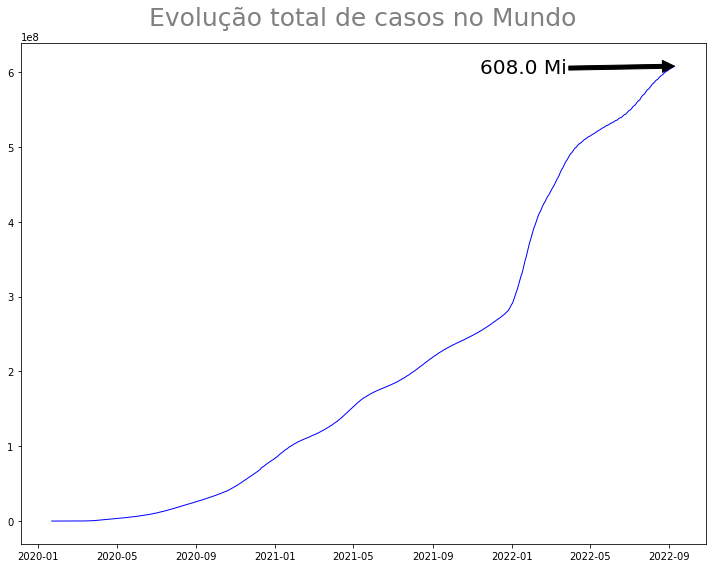

In [212]:
# instanciando objetos do gráfico
fig, ax = plt.subplots(figsize=(10,8))

#flitrando somente dados sobre o Mundo
df_temp = df.loc[df.location == "World", ["date", "total_cases"]]

# plotando dados filtrados no gráfico
ax.plot(df_temp.date, df_temp.total_cases, color="blue", lw=1)

# coletando as posições x e y para indicação do máximo de casos
x1 = df_temp['date'][df_temp['total_cases'].idxmax()]
y1 = max(df_temp.total_cases)

# coletando as posições x e y para a posição do texto
x2 = x1-timedelta(300)
y2 = max(df_temp.total_cases-10000000)

# adicionando anotação no gráfico
ax.annotate(intword(round(max(df_temp.total_cases),-6)).replace("million", "Mi"),
              xy=(x1, y1),
              fontsize=20,
              xytext=(x2, y2), 
              arrowprops=dict(facecolor='k'))

# adicionando título ao gráfico
ax.set_title('Evolução total de casos no Mundo', fontsize=25, pad=18, color="grey");

plt.tight_layout()

O gráfico acima nos mostra que 100 milhões de casos foram atingidos em pouco mais de 1 ano. Além disso, a partir de Janeiro de 2022 houve um crescimento de casos acima do normal se compararmos a evolução do vírus até este momento.

## Gráfico de linhas mostrando a evolução de novos casos

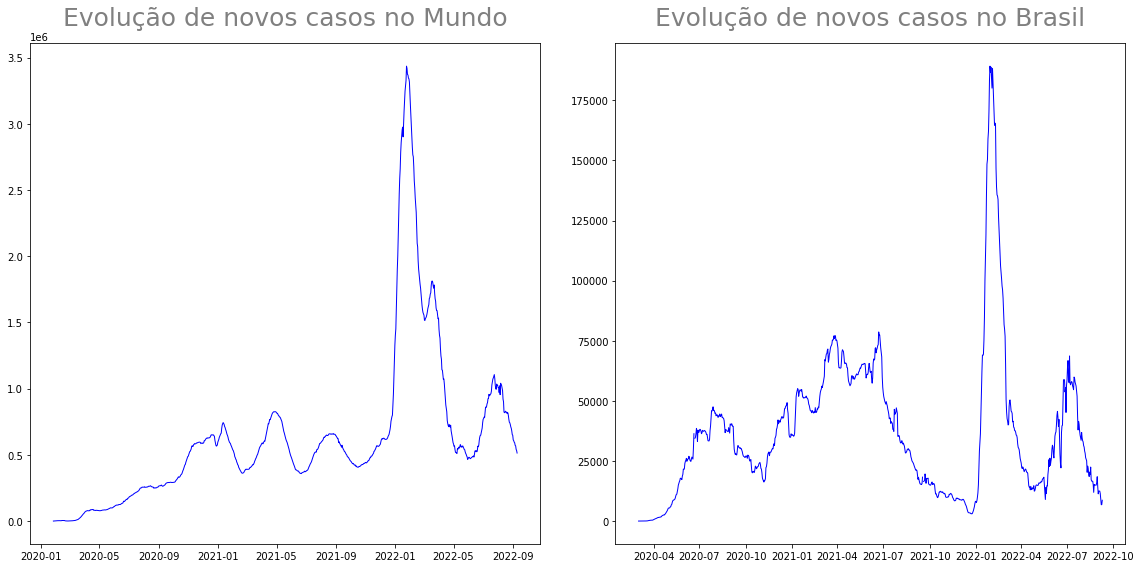

In [213]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# flitrando dados do Mundo e do Brasil e alocando em dois dataframes diferentes
df_wrl = df.loc[df.location == "World", ["date", "new_cases_smoothed"]]
df_brl = df.loc[df.location == "Brazil", ["date", "new_cases_smoothed"]]

# plotando dados sobre o Mundo
ax[0].plot(df_wrl.date, df_wrl.new_cases_smoothed, color="blue", lw=1)
ax[0].set_title('Evolução de novos casos no Mundo', fontsize=25, pad=18, color="grey");

# plotando dados sobre o Brasil 
ax[1].plot(df_brl.date, df_brl.new_cases_smoothed, color="blue", lw=1)
ax[1].set_title('Evolução de novos casos no Brasil', fontsize=25, pad=18, color="grey");

plt.tight_layout()

Analisando a variável ```new_cases``` o pico de casos detectado no gráfico anterior ocorrido em Janeiro de 2022 se repete neste gráfico quando analisamos novos casos, ou seja, em Janeiro de 2022 houve um aumento de aproximadamente 5 milhoes de casos a mais do que o normal. Aqui também podemos detectar pequenos picos nos meses de Dezembro e Janeiro de 2021, Abril, Maio, Agosto e Setembro de 2022. Mais além tentaremos descobrir se há algum motivo para estes picos.

## Paises maior número de casos registrados

In [214]:
df[~df.iso_code.str.startswith("OWID") & (df.date == max(df.date))].head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
928,AFG,Asia,Afghanistan,2022-09-09,195471.0,173.0,278.714,7786.0,0.0,1.143,4874.654,4.314,6.951,194.167,0.0,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
2796,ALB,Europe,Albania,2022-09-09,330842.0,155.0,140.000,3584.0,0.0,0.143,115893.383,54.296,49.042,1255.469,0.0,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2854710.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
3724,DZA,Africa,Algeria,2022-09-09,270522.0,15.0,16.714,6879.0,0.0,0.143,6123.459,0.340,0.378,155.711,0.0,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44177969.0,17.348,29.1,6.211,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
4646,AND,Europe,Andorra,2022-09-09,46113.0,0.0,12.286,155.0,0.0,0.143,583457.752,0.000,155.448,1961.181,0.0,1.808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79034.0,163.755,NaN,NaN,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
5550,AGO,Africa,Angola,2022-09-09,103131.0,495.0,70.714,1917.0,0.0,0.000,2988.977,14.346,2.049,55.559,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34503774.0,23.890,16.8,2.405,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN


In [215]:
# considerando somente países validos e a última data
df_location_last_date = df[(~df.iso_code.str.startswith("OWID")) & (df.date == max(df.date))]

# ordenando pela variável total_cases e considerando apenas os cinco primeiros registros
df_top5_total_cases = df_location_last_date.sort_values(by=["total_cases"], ascending=False)[["iso_code", "location", "total_cases"]].head()

# imprimindo os cinco primeiros registros
df_top5_total_cases.head()

,iso_code,location,total_cases
203765,USA,United States,95224801.0
89449,IND,India,44490283.0
68705,FRA,France,34744372.0
27682,BRA,Brazil,34516739.0
73317,DEU,Germany,32452250.0


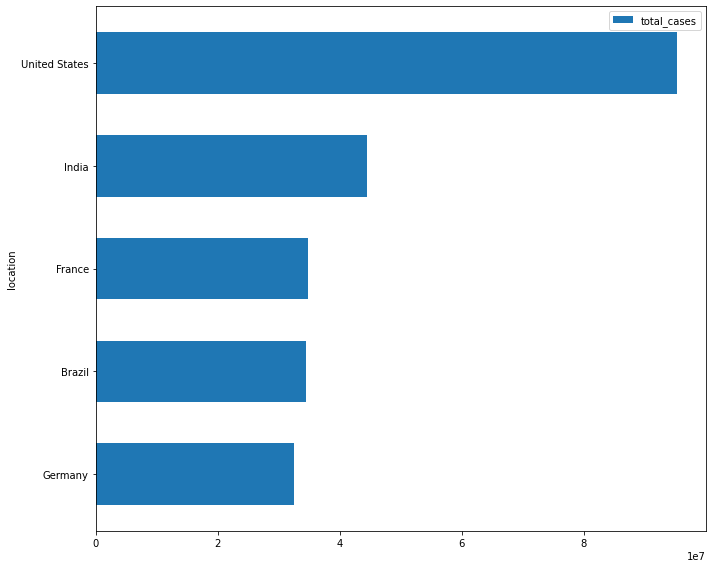

In [216]:
# criando os objetos para o gráfico
fig, ax = plt.subplots(figsize=(10,8))

# invertendo a ordem dos dados para que o país com maior número de casos esteja no topo do gráfico.
# plotando gráfico de barras horizontal.
df_top5_total_cases.sort_values(by=["total_cases"], ascending=True).plot(x="location", y="total_cases", kind="barh", ax=ax, width=0.6)

plt.tight_layout()

Estados Unidos lidera o rancking com aproximadamente 90 milhões de casos registrados. O Brasil ocupa o quarto lugar com aproximadamente 30 milhões de casos registrados.

## Países com a menor quantidade de casos registradas

In [217]:
# ordenando pela variável total_cases e considerando apenas os cinco primeiros registros
df_lowest5_total_cases = df_location_last_date.sort_values(by=["total_cases"], ascending=True)[["iso_code", "location", "total_cases"]].head()

# imprimindo os cinco primeiros registros
df_lowest5_total_cases.head()

,iso_code,location,total_cases
143280,PRK,North Korea,1.0
162360,SHN,Saint Helena,7.0
208952,VAT,Vatican,29.0
211514,WLF,Wallis and Futuna,761.0
116328,MAC,Macao,793.0


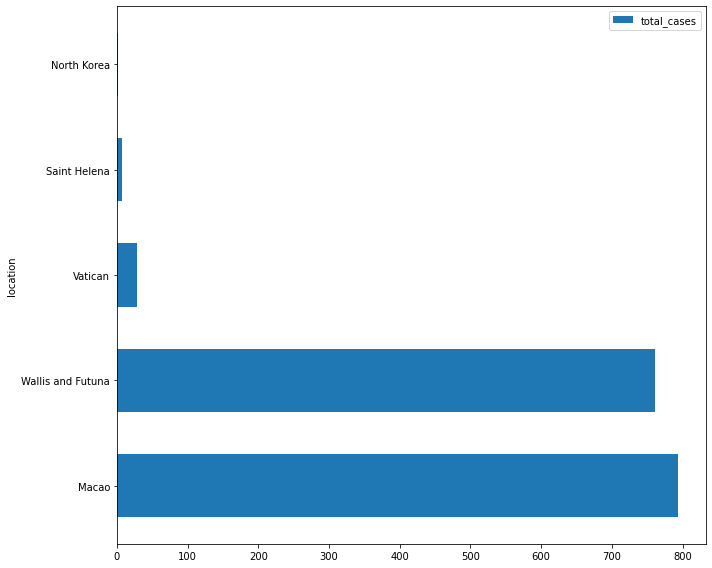

In [218]:
# criando os objetos para o gráfico
fig, ax = plt.subplots(figsize=(10,8))

# invertendo a ordem dos dados para que o país com maior número de casos esteja no topo do gráfico.
# plotando gráfico de barras horizontal.
df_lowest5_total_cases.sort_values(by=["total_cases"], ascending=False).plot(x="location", y="total_cases", kind="barh", ax=ax, width=0.6)

plt.tight_layout()

Curiosamente, vemos aqui que a Coreia do Norte apresenta apenas um registro de COVID e quatro casos em Saint Helena uma ilha localizada praticamente a meio do Atlântico Sul.

Em uma pesquisa rápida no Google podemos encontrar notícias sobre número baixíssmo na Coreia do Norte e parece que o país não foi transparente em relação ao cenário real do país alegando que a Coreia do Norte não registra casos confirmados de Covid-19.

Já a ilha de Santa Helena tudo indica que pelo fato de ser uma ilha remota de pequena população e baixo fluxo de pessoas.



# Verificando as variáveis `total_cases_per_million`, `new_cases_per_million`,  `new_cases_smoothed_per_million`

`total_cases_per_million` é resultante do calculo (`total_cases`/`population`)*1000000. Para `new_cases_per_million` e `new_cases_smoothed_per_million` utiliza-se a mesma fórmula trocando apenas a variável de `total_cases`.

Novamente, com esta analise podemos concluir o por que termos dados vazios nestas variáveis.

In [219]:
df[["iso_code",
    "continent",
    "location",
    "date",
    "total_cases",
    "new_cases",
    "new_cases_smoothed",
    "total_cases_per_million",
    "new_cases_per_million",
    "new_cases_smoothed_per_million",
    "population"]].head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,0.125,0.125,NaN,40099462.0
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,0.125,0.000,NaN,40099462.0
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,0.125,0.000,NaN,40099462.0
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,0.125,0.000,NaN,40099462.0
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,0.125,0.000,NaN,40099462.0
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,0.125,0.000,0.018,40099462.0
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,0.125,0.000,0.018,40099462.0
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,0.125,0.000,0.000,40099462.0
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,0.125,0.000,0.000,40099462.0
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,0.125,0.000,0.000,40099462.0


#Verificando as variáveis `total_deaths`, `new_deaths`, `new_deaths_smoothed`,  `total_deaths_per_million`, `new_deaths_per_million`,`new_deaths_smoothed_per_million`

Olhando os primeiros registros nenhum valor é encontrado.

In [220]:
df[["iso_code", 
    "continent", 
    "location", 
    "date", 
    "total_deaths", 
    "new_deaths", 
    "new_deaths_smoothed", 
    "total_deaths_per_million",
    "new_deaths_per_million",	
    "new_deaths_smoothed_per_million",
    "population"]].head(20)

,iso_code,continent,location,date,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,population
0,AFG,Asia,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
1,AFG,Asia,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
2,AFG,Asia,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
3,AFG,Asia,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
4,AFG,Asia,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
5,AFG,Asia,Afghanistan,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
6,AFG,Asia,Afghanistan,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
7,AFG,Asia,Afghanistan,2020-03-02,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
8,AFG,Asia,Afghanistan,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0
9,AFG,Asia,Afghanistan,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,40099462.0


O comportamento aqui se repete para os casos de morte assim como foi detalhado nas variáveis que informam a quantidade de casos.

Pela analise, interpreta-se que os valores NaN informam que em determinada data não houve nenhum caso de morte e nas variáveis que são médias móveis, os valores NaN são consequencias resultantes dos calculos.

In [221]:
df[~df.total_deaths.isna()][["iso_code", 
                             "continent", 
                             "location", 
                             "date", 
                             "total_deaths", 
                             "new_deaths", 
                             "new_deaths_smoothed", 
                             "total_deaths_per_million", 
                             "new_deaths_per_million",
                             "new_deaths_smoothed_per_million", 
                             "population"]].head(20)

,iso_code,continent,location,date,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,population
28,AFG,Asia,Afghanistan,2020-03-23,1.0,1.0,NaN,0.025,0.025,NaN,40099462.0
29,AFG,Asia,Afghanistan,2020-03-24,1.0,0.0,NaN,0.025,0.000,NaN,40099462.0
30,AFG,Asia,Afghanistan,2020-03-25,1.0,0.0,NaN,0.025,0.000,NaN,40099462.0
31,AFG,Asia,Afghanistan,2020-03-26,2.0,1.0,NaN,0.050,0.025,NaN,40099462.0
32,AFG,Asia,Afghanistan,2020-03-27,2.0,0.0,NaN,0.050,0.000,NaN,40099462.0
33,AFG,Asia,Afghanistan,2020-03-28,2.0,0.0,0.286,0.050,0.000,0.007,40099462.0
34,AFG,Asia,Afghanistan,2020-03-29,4.0,2.0,0.571,0.100,0.050,0.014,40099462.0
35,AFG,Asia,Afghanistan,2020-03-30,4.0,0.0,0.429,0.100,0.000,0.011,40099462.0
36,AFG,Asia,Afghanistan,2020-03-31,4.0,0.0,0.429,0.100,0.000,0.011,40099462.0
37,AFG,Asia,Afghanistan,2020-04-01,4.0,0.0,0.429,0.100,0.000,0.011,40099462.0


## Gráfico de linhas mostrando o total de mortes no Mundo

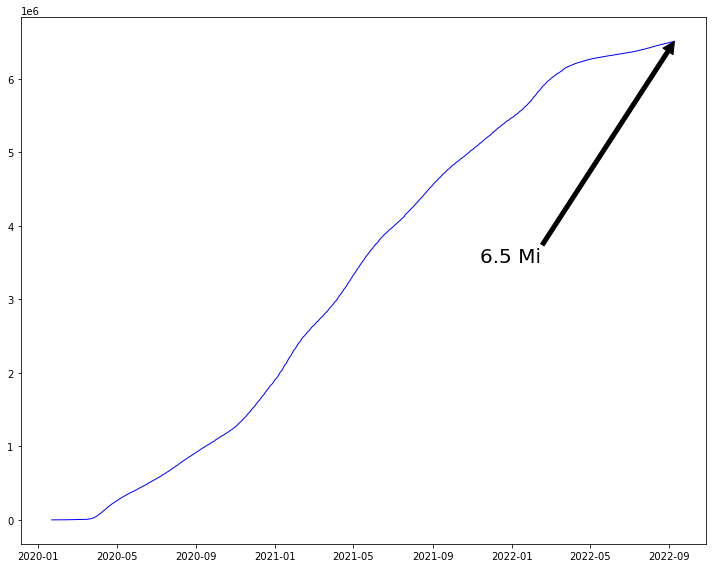

In [222]:
# instanciando objetos do gráfico
fig, ax = plt.subplots(figsize=(10,8))

df_temp = df[~df.total_deaths.isna()].loc[df.location == "World", ["date", "total_deaths"]]

# coletando as posições x e y para indicação do máximo de casos
x1 = df_temp['date'][df_temp['total_deaths'].idxmax()]
y1 = max(df_temp.total_deaths)

# coletando as posições x e y para a posição do texto
x2 = x1-timedelta(300)
y2 = max(df_temp.total_deaths-3000000)

# adicionando anotação no gráfico
ax.annotate(intword(round(max(df_temp.total_deaths),-5)).replace("million", "Mi"),
              xy=(x1, y1),
              fontsize=20,
              xytext=(x2, y2), 
              arrowprops=dict(facecolor='k'))

# plotando dados filtrados no gráfico
ax.plot(df_temp.date, df_temp.total_deaths, color="blue", lw=1)

plt.tight_layout()

Plotando os dados de mortes podemos ver que, globalmente, os primeiros casos de morte foram registrados em Janeiro de 2020 e seu aumento se deu em meados de Abril de 2022 alcançando a marca de 1 milhão de mortes em torno de dez meses.

Além disso precebe-se uma perda de força no aumento da quantidade de mortes a partir de Abril de 2022 aproximadamente.

Até o momento tem-se um total de aproximadamente 6.5 milhões de mortes registradas no Mundo. Comparando com o total de casos registrados (aproximadamente 608 Milhões), o que dá uma taxa de aproximadasmente 1.07%. Podemos ver este comparativo no gráfico abaixo, onde os dados de quantidade de casos e quantidade mortes são plotados no mesmo gráfico.

## Número total de casos vs Total de mortes

Comparando a o número total de casos com o número total de mortes ao longo do tempo.

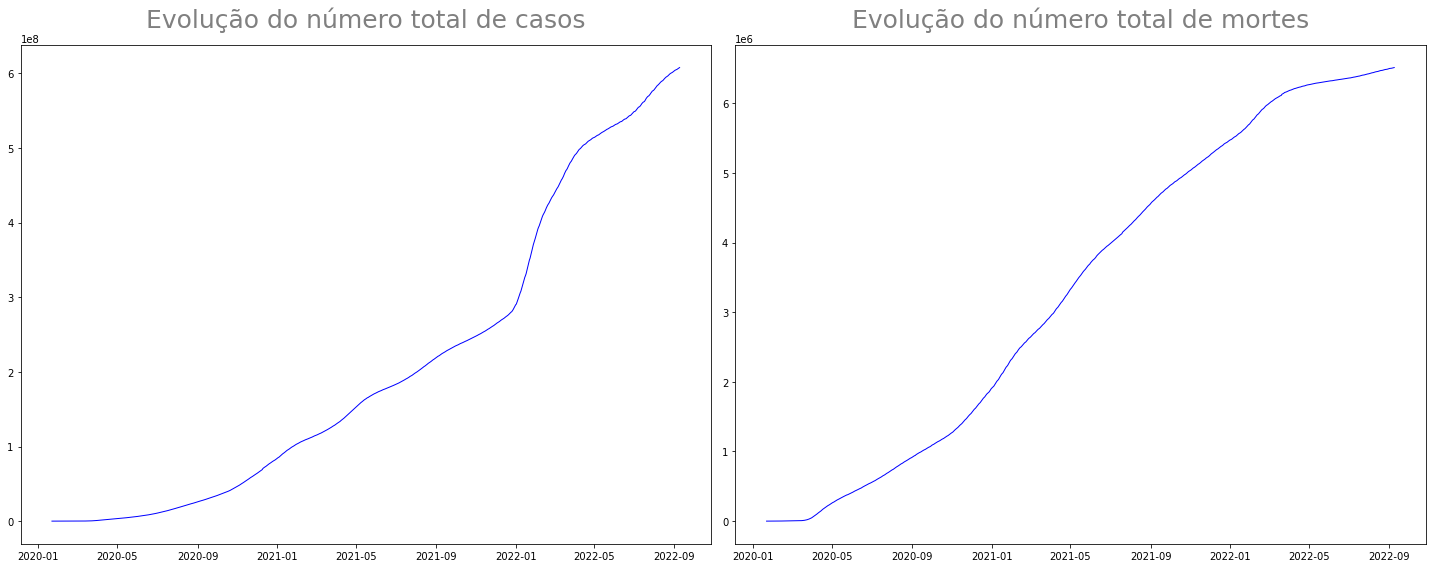

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

df_total_cases_wrl = df.loc[df.location == "World", ["date", "total_cases"]]
ax[0].plot(df_total_cases_wrl.date, df_total_cases_wrl.total_cases, color="blue", lw=1)
ax[0].set_title("Evolução do número total de casos", fontsize=25, pad=18, color="grey")

df_total_deaths_wrl = df.loc[df.location == "World", ["date", "total_deaths"]]
ax[1].plot(df_total_deaths_wrl.date, df_total_deaths_wrl.total_deaths, color="blue", lw=1)
ax[1].set_title("Evolução do número total de mortes", fontsize=25, pad=18, color="grey")

plt.tight_layout()

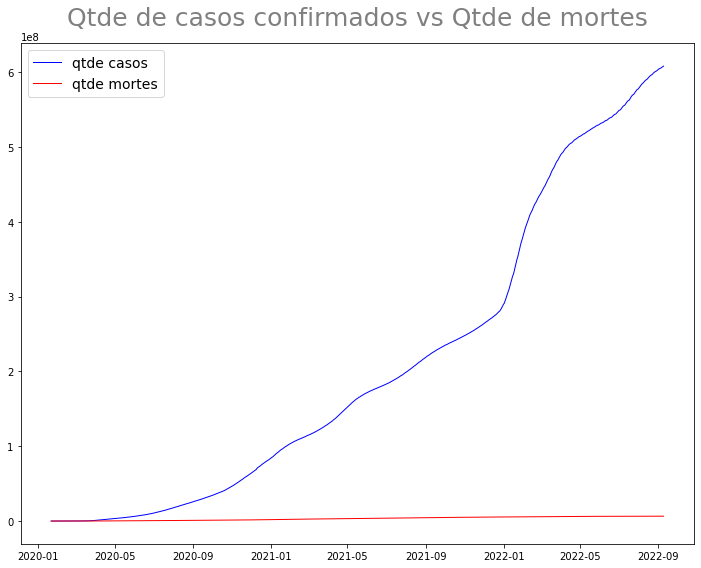

In [224]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df_total_cases_wrl.date, df_total_cases_wrl.total_cases, color="blue", lw=1)
ax.plot(df_total_deaths_wrl.date, df_total_deaths_wrl.total_deaths, color="red", lw=1)

ax.legend(["qtde casos", "qtde mortes"], loc='best', fontsize=14)

ax.set_title("Qtde de casos confirmados vs Qtde de mortes", fontsize=25, pad=18, color="grey")

plt.tight_layout()

Neste comparativo podemos ver que desde o início da pandemia o comportamento do aumento de casos e o aumento de casos de morte tem sido similar. A partir de Abril de 2022 é possível perceber uma perda de força no aumento da quantidade de mortes mesmo com o aumento de casos se mantendo.
Além disso é possível visualizar que a quantidade de mortes é mínima em comparação a quantidade de casos confirmados.

## Número de novos casos vs novas mortes mortes

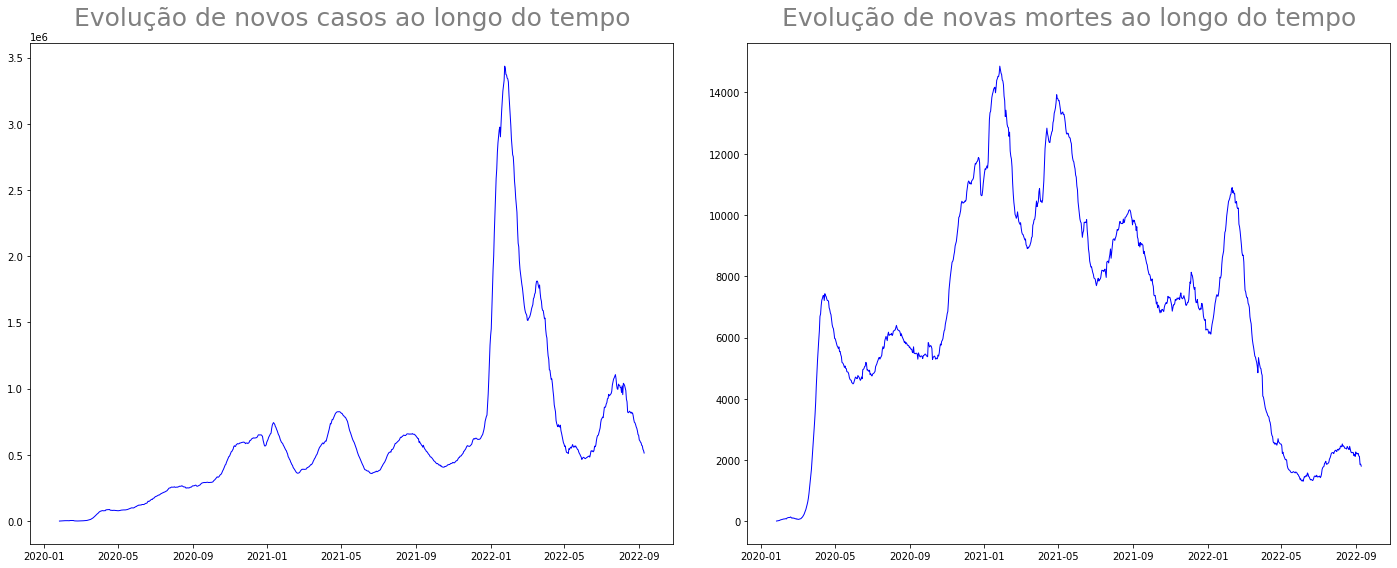

In [225]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

df_new_cases_wrl = df.loc[df.location == "World", ["date", "new_cases_smoothed"]]
ax[0].plot(df_new_cases_wrl.date, df_new_cases_wrl.new_cases_smoothed, color="blue", lw=1)
ax[0].set_title("Evolução de novos casos ao longo do tempo", fontsize=25, pad=18, color="grey")

df_new_deaths_wrl = df.loc[df.location == "World", ["date", "new_deaths_smoothed"]]
ax[1].plot(df_new_deaths_wrl.date, df_new_deaths_wrl.new_deaths_smoothed, color="blue", lw=1)
ax[1].set_title("Evolução de novas mortes ao longo do tempo", fontsize=25, pad=18, color="grey")

plt.tight_layout()

Analisando a variável ```new_deaths_smoothed``` conseguimos ver o salto de mortes no início de 2020 e em 2022 fica claro a perda de força na mortes mostrada no gráfico anterior. Podemos ver aqui uma queda brusca na quantidade de novas mortes. Provavelmente este efeito se dá pela chegada da vacina.

In [226]:
df_wrl = df.loc[df.location == "World"]

df_wrl[["new_cases_smoothed", "new_deaths_smoothed"]].corr(method='pearson')

,new_cases_smoothed,new_deaths_smoothed
new_cases_smoothed,1.000000,0.203391
new_deaths_smoothed,0.203391,1.000000


## Heatmap mostrando a correção de novos casos e novas mortes

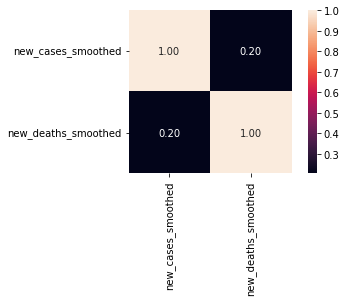

In [227]:
fig, ax = plt.subplots(figsize=(6,3))

sns.heatmap(df_wrl[["new_cases_smoothed", "new_deaths_smoothed"]].corr(), fmt=".2f", square=True, linecolor="white", vmax=1.0, annot=True);

Podemos ver uma certa correlação entre estas duas variáveis. Os picos no gráfico de novos casos também causam picos no gráfico de novas mortes.

## Países com maior número de mortes registradas

In [228]:
# considerando somente países validos e a última data
df_location_last_date = df[(~df.iso_code.str.startswith("OWID")) & (df.date == max(df.date))]

# ordenando pela variável total_cases e considerando apenas os cinco primeiros registros
df_top5_total_deaths = df_location_last_date.sort_values(by=["total_deaths"], ascending=False)[["iso_code", "date", "location", "total_deaths"]].head()

# imprimindo os cinco primeiros registros
df_top5_total_deaths.head()

,iso_code,date,location,total_deaths
203765,USA,2022-09-09,United States,1050290.0
27682,BRA,2022-09-09,Brazil,684813.0
89449,IND,2022-09-09,India,528139.0
160717,RUS,2022-09-09,Russia,377368.0
125476,MEX,2022-09-09,Mexico,329652.0


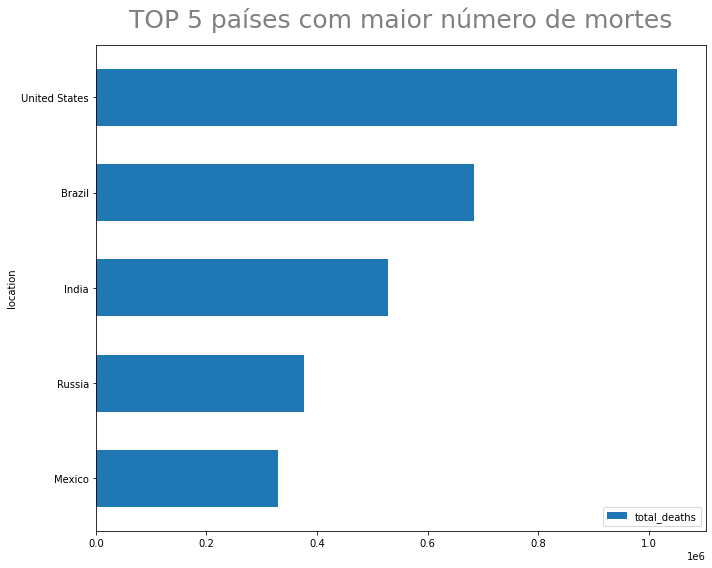

In [229]:
# criando os objetos para o gráfico
fig, ax = plt.subplots(figsize=(10,8))

# invertendo a ordem dos dados para que o país com maior número de casos esteja no topo do gráfico.
# plotando gráfico de barras horizontal.
df_top5_total_deaths.sort_values(by=["total_deaths"], ascending=True).plot(x="location", y="total_deaths", kind="barh", ax=ax, width=0.6)

ax.set_title("TOP 5 países com maior número de mortes", fontsize=25, pad=18, color="grey")

plt.tight_layout()

Estados Unidos lidera como país com mais número de mortes, registrando mais de 1 milhão de mortes.

O Brasil, apesar de ser quarto colocado entre os países com maior número de casos, está em segundo lugar em quantidade de mortos, registrando aproximadamente 680 mil mortos.

## Total de casos confirmados (por faixa de renda)

Neste plot vamos usar o stackplot. Este tipo de gráfico é muito usado para plotar dados lineares de forma vertical (empilhada), ou seja, representar o acumulo de algo.

### Referências
[Matplotlib Stack Plot](https://stackabuse.com/matplotlib-stack-plot-tutorial-and-examples/)

In [230]:
# lista com os iso_codes 
select = ["OWID_LIC", "OWID_LMC", "OWID_HIC", "OWID_UMC"]

# selecionando somente os dados ao qual os iso_codes estão na lista
df_incomes = df[df.iso_code.isin(select)]

# fazendo agrupamento por iso_code e convertendo para lista a coluna total_cases
# returna uma Series de listas
income_total_cases = df_incomes.groupby("iso_code")["total_cases"].apply(list) 

# convertendo a Series em um dicionário key, value
income_total_cases = income_total_cases.to_dict()

# definindo um ordem customizada para o stackplot
income_order = ["OWID_UMC", "OWID_HIC", "OWID_LMC", "OWID_LIC"]

# aplicando a ordem customizada em um OrderedDict()
income_total_cases_ordered = OrderedDict()
for key in income_order:
  income_total_cases_ordered[key] = income_total_cases[key]

# imprimindo resultado
for k,v in income_total_cases_ordered.items():
  print(k,v)

OWID_UMC [551.0, 643.0, 921.0, 1409.0, 2074.0, 2875.0, 5512.0, 6091.0, 8146.0, 9812.0, 11900.0, 16636.0, 19722.0, 23717.0, 27448.0, 30594.0, 34117.0, 36828.0, 39841.0, 42358.0, 44380.0, 44752.0, 59885.0, 66346.0, 68405.0, 70504.0, 72423.0, 74198.0, 74605.0, 75058.0, 75532.0, 76982.0, 76998.0, 77213.0, 77723.0, 78140.0, 78576.0, 78909.0, 79353.0, 79954.0, 80166.0, 80307.0, 80455.0, 80631.0, 80852.0, 80967.0, 81092.0, 81161.0, 81284.0, 81440.0, 81554.0, 81968.0, 82269.0, 82704.0, 83228.0, 83903.0, 84663.0, 85840.0, 87169.0, 88852.0, 91634.0, 93734.0, 95939.0, 98419.0, 102209.0, 106975.0, 111412.0, 115953.0, 119965.0, 128235.0, 134537.0, 141669.0, 148981.0, 156625.0, 164367.0, 172139.0, 182030.0, 194590.0, 206587.0, 220762.0, 232667.0, 245198.0, 258332.0, 270563.0, 286059.0, 301361.0, 318538.0, 335110.0, 352204.0, 367808.0, 385424.0, 402360.0, 421259.0, 451396.0, 473492.0, 492311.0, 510576.0, 533053.0, 556358.0, 582190.0, 607273.0, 632349.0, 659603.0, 687105.0, 714673.0, 747567.0, 777926.

O ```len``` das listas de cada ```iso_code``` possui tamanho diferentes. Para plotar um gráfico ```stackplot``` é necessário que estas dimensões sejam iguais.
No código abaixo são feitas estas alterações.

In [231]:
# EXEMPLO
#
#     OWID_UMC: [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 4, 5, 2, 8, 4, 6, 8, 1] <-- max_key, max_value
#     OWID_HIC: [5, 6, 4, 8, 5, 1, 2, 3, 5, 8, 1, 2]
#     OWID_LMC: [7, 9, 2, 4, 8, 2, 1, 5, 7, 9, 5, 1, 3, 2, 1, 8, 4, 5]
#     OWID_LIC: [4, 5, 6, 8, 7, 8, 2, 1, 3, 5, 8, 4, 5, 6]

In [232]:
# buscando a chave e lista com maior len
max_key, max_value = max(income_total_cases_ordered.items(), key = lambda x: len(set(x[1])))

# imprimindo resultado
print(max_key, len(max_value))

OWID_UMC 962


In [233]:
# colocando zeros a esquerda até todas as listas estarem com o mesmo len de max_key, max_value
income_total_cases_dict_full = {}
for k,v in income_total_cases_ordered.items():
  if len(v) < len(max_value):
    trailing_zeros = [0]*(len(max_value)-len(v))
    income_total_cases_dict_full[k] = trailing_zeros+v
  else:
    income_total_cases_dict_full[k] = v

In [234]:
# Após execução do laço for na célula acima
#
#     OWID_UMC: [1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 7, 6, 4, 5, 2, 8, 4, 6, 8, 1]
#     OWID_HIC: [0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 4, 8, 5, 1, 2, 3, 5, 8, 1, 2]
#     OWID_LMC: [0, 0, 7, 9, 2, 4, 8, 2, 1, 5, 7, 9, 5, 1, 3, 2, 1, 8, 4, 5]
#     OWID_LIC: [0, 0, 0, 0, 0, 0, 4, 5, 6, 8, 7, 8, 2, 1, 3, 5, 8, 4, 5, 6]

In [235]:
dates = df_incomes[df_incomes.iso_code==max_key].date

print(min(dates), max(dates))

xtick_pos_str = ["2020-01-22", "2020-03-15", "2020-05-15", "2020-07-15", "2020-09-15", "2020-11-15", 
                 "2021-01-15", "2021-03-15", "2021-05-15", "2021-07-15", "2021-09-15", "2021-11-15", 
                 "2022-01-15", "2022-03-15", "2022-05-15", "2022-07-15"]

xtick_pos_dt = []

for date in xtick_pos_str:
  xtick_pos_dt.append(datetime.strptime(date, "%Y-%m-%d"))

xtick_labels = ["JAN\n2020", "MAR", "MAI", "JUL", "SET", "NOV", 
                "JAN\n2021", "MAR", "MAI", "JUL", "SET", "NOV",
                "JAN\n2022", "MAR", "MAI", "JUL"]

2020-01-22 00:00:00 2022-09-09 00:00:00


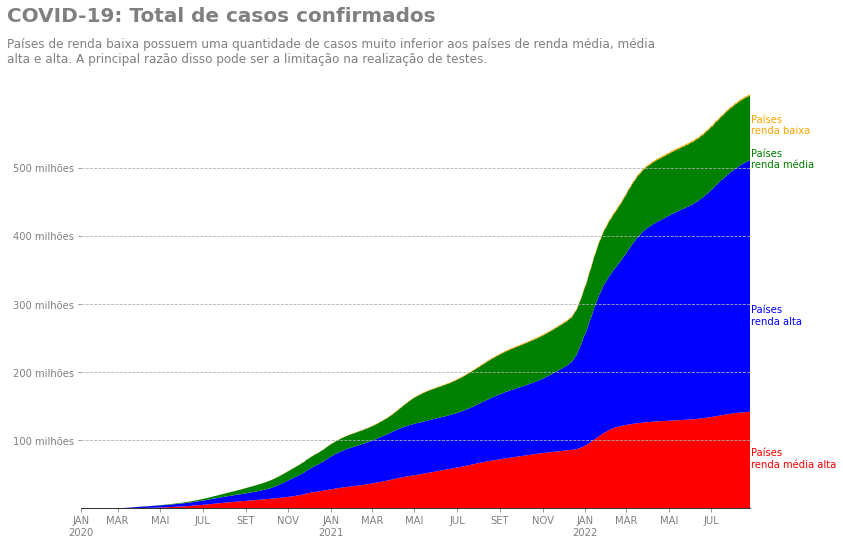

In [236]:
# https://ourworldindata.org/grapher/covid-cases-income

color_map = ["red", "blue", "green", "orange"]

fig, ax = plt.subplots(figsize=(12, 8))
ax.stackplot(dates, income_total_cases_dict_full.values(), labels=income_total_cases_dict_full.keys(), colors=color_map)

ax.tick_params(axis='y', colors="grey")
ax.tick_params(axis='x', colors="grey")
ax.grid(axis="y", ls="--")
ax.set_yticks([100000000, 200000000, 300000000, 400000000, 500000000])
ax.set_yticklabels(["100 milhões", "200 milhões", "300 milhões", "400 milhões", "500 milhões"])
ax.set_xticks(xtick_pos_dt)
ax.set_xticklabels(xtick_labels)

ax.set_xlim(min(dates), max(dates))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# coordenadas X e Y do título e subtítulo
x = 0.040
y = 0.90

# adicionando título e subtítulo
plt.text(x=x, y=y+0.07, s="COVID-19: Total de casos confirmados", fontsize=20, ha="left", transform=fig.transFigure, color="grey", fontweight="semibold")
plt.text(x=x, y=y, s= "Países de renda baixa possuem uma quantidade de casos muito inferior aos países de renda média, média\nalta e alta. A principal razão disso pode ser a limitação na realização de testes.", fontsize=12, ha="left", transform=fig.transFigure, color="grey")

ax.annotate("Países\nrenda baixa", xy=(max(dates)+timedelta(days=0.6), 550000000), color='orange')
ax.annotate("Países\nrenda média", xy=(max(dates)+timedelta(days=0.6), 500000000), color='green')
ax.annotate("Países\nrenda alta", xy=(max(dates)+timedelta(days=0.6), 270000000), color='blue')
ax.annotate("Países\nrenda média alta", xy=(max(dates)+timedelta(days=0.6), 60000000), color='red')

# ax.legend(loc='upper left', ncol=4)
plt.show()

# Taxa de reprodução `reproduction_rate`

O número efetivo de reprodução R determina o potencial de propagação de um vírus dentro de determinadas condições. 

Se este número é igual ou superior a 1, cada paciente transmite a doença a pelo menos mais uma pessoa, e o vírus se dissemina.

Se este número é menor do que 1, cada vez menos indivíduos se infectam e o número de contágios retrocede.

In [237]:
df[["iso_code", "location", "date", "new_cases", "reproduction_rate"]].head(50)

,iso_code,location,date,new_cases,reproduction_rate
0,AFG,Afghanistan,2020-02-24,5.0,NaN
1,AFG,Afghanistan,2020-02-25,0.0,NaN
2,AFG,Afghanistan,2020-02-26,0.0,NaN
3,AFG,Afghanistan,2020-02-27,0.0,NaN
4,AFG,Afghanistan,2020-02-28,0.0,NaN
5,AFG,Afghanistan,2020-02-29,0.0,NaN
6,AFG,Afghanistan,2020-03-01,0.0,NaN
7,AFG,Afghanistan,2020-03-02,0.0,NaN
8,AFG,Afghanistan,2020-03-03,0.0,NaN
9,AFG,Afghanistan,2020-03-04,0.0,NaN


## Gráfico de linhas mostrando a taxa de reprodução do vírus ao longo do tempo (Mundo vs Brasil)

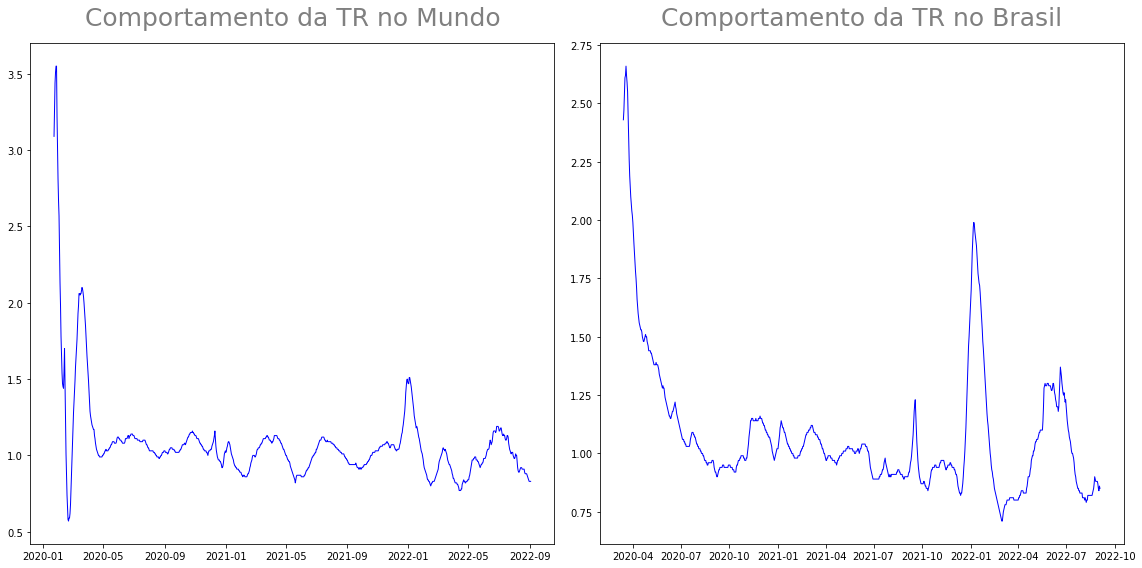

In [238]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

df_repr_rate_world = df[(df.location == "World") & (~df.reproduction_rate.isna())][["iso_code", "location", "date", "reproduction_rate"]]
df_repr_rate_brasil = df[(df.location == "Brazil") & (~df.reproduction_rate.isna())][["iso_code", "location", "date", "reproduction_rate"]]

ax[0].plot(df_repr_rate_world.date, df_repr_rate_world.reproduction_rate, color="blue", lw=1)
ax[1].plot(df_repr_rate_brasil.date, df_repr_rate_brasil.reproduction_rate, color="blue", lw=1)

ax[0].set_title("Comportamento da TR no Mundo", fontsize=25, pad=18, color="grey")
ax[1].set_title("Comportamento da TR no Brasil", fontsize=25, pad=18, color="grey")

plt.tight_layout()

Neste gráfico podemos ver uma alta taxa de reprodução do vírus no início da pandemia e conforme foi se entendendo a gravidade deste vírus, medidas preventivas foram sendo tomadas para a diminuição da taxa de reprodução.

Isto pode ser visualizado no gráfico acima. Além disso temos momentos de alta e baixa na taxa de reprodução, o motivo desse efeito pode ser devido as mutações que o vírus vem sofrendo ao longo do tempo tornando-o mais transmissível e aumentando sua taxa de reprodução.

No Brasil temos um comportamento muito semelhante se compararmos com o gráfico da taxa de reprodução global com um aumento muito forte em Janeiro de 2022.

## Variantes do Coronavírus

Datas de surgimento das variantes conforme site [World Health Organization](https://www.who.int/activities/tracking-SARS-CoV-2-variants)

In [239]:
alpha   = dt.datetime(2020, 9, 1)
beta    = dt.datetime(2020, 5, 1)
gamma   = dt.datetime(2020, 11, 1)
delta   = dt.datetime(2020, 10, 1)
omicron = dt.datetime(2021, 11, 1)

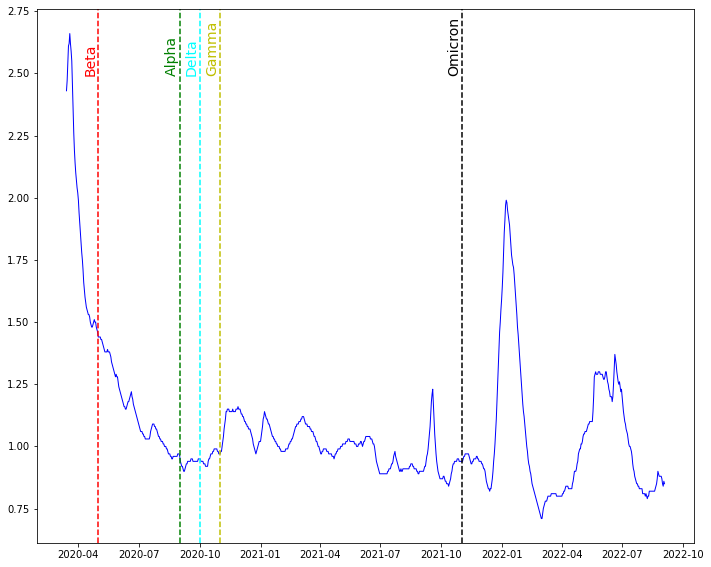

In [240]:
fig, ax = plt.subplots(figsize=(10,8))

df_repr_rate_brasil = df[(df.location == "Brazil") & (~df.reproduction_rate.isna())][["iso_code", "location", "date", "reproduction_rate"]]

ax.plot(df_repr_rate_brasil.date, df_repr_rate_brasil.reproduction_rate, color="blue", lw=1)

ax.axvline(alpha, color="g", ls="--")
ax.axvline(beta, color="r", ls="--")
ax.axvline(gamma, color="y", ls="--")
ax.axvline(delta, color="cyan", ls="--")
ax.axvline(omicron, color="k", ls="--")

ax.annotate('Alpha', xy=(alpha-timedelta(days=22), 2.5), fontsize=14, rotation=90, color="g")
ax.annotate('Beta', xy=(beta-timedelta(days=22), 2.5), fontsize=14, rotation=90, color="r")
ax.annotate('Gamma', xy=(gamma-timedelta(days=22), 2.5), fontsize=14, rotation=90, color="y")
ax.annotate('Delta', xy=(delta-timedelta(days=22), 2.5), fontsize=14, rotation=90, color="cyan")
ax.annotate('Omicron', xy=(omicron-timedelta(days=22), 2.5), fontsize=14, rotation=90, color="k")


plt.tight_layout()

Nesta gráfico é indicado, sobre os dados da taxa de reprodução do vírus, os momentos do surgimento das novas variantes do corona virus. Com isso tenta-se verificar se o surgimento de novas variantes influenciaram sobre o aumento da taxa de reprodução.
Assim como dado em alguns sites de notícias, podemos dizer que o pico na taxa de reprodução e o aumento de novos casos no Brasil e no Mundo, conforme já demostrados em gráficos anteriores tem uma certa relação com a variante Omicron.

# Verificando as variáveis ```icu_patients```	```icu_patients_per_million```	```hosp_patients```	```hosp_patients_per_million```	```weekly_icu_admissions```	```weekly_icu_admissions_per_million```	```weekly_hosp_admissions``` ```weekly_hosp_admissions_per_million```

In [241]:
df[["icu_patients",
    "icu_patients_per_million",
    "hosp_patients_per_million",
    "weekly_icu_admissions",
    "weekly_icu_admissions_per_million",
    "weekly_hosp_admissions",
    "weekly_hosp_admissions_per_million"]].head()

,icu_patients,icu_patients_per_million,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
df[["icu_patients",
    "icu_patients_per_million",
    "hosp_patients_per_million",
    "weekly_icu_admissions",
    "weekly_icu_admissions_per_million",
    "weekly_hosp_admissions",
    "weekly_hosp_admissions_per_million"]].isna().sum()/df.shape[0]*100

icu_patients                          87.228297
icu_patients_per_million              87.228297
hosp_patients_per_million             85.962792
weekly_icu_admissions                 96.715171
weekly_icu_admissions_per_million     96.715171
weekly_hosp_admissions                93.502842
weekly_hosp_admissions_per_million    93.502842
dtype: float64

As variáveis que dizem respeito a internações não serão analisadas pois possuem mais que 80% de dados faltantes.

# Verificando as variáveis `total_tests`,	`new_tests`,	`total_tests_per_thousand`,	`new_tests_per_thousand`,	`new_tests_smoothed`,	`new_tests_smoothed_per_thousand`, `positive_rate`,	`tests_per_case`,	`tests_units`

In [243]:
df[["total_tests",
    "new_tests",
    "total_tests_per_thousand",
    "new_tests_per_thousand",
    "new_tests_smoothed",
    "new_tests_smoothed_per_thousand",
    "positive_rate",
    "tests_per_case",
    "tests_units"]].head()

,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
df[["total_tests",
    "new_tests",
    "total_tests_per_thousand",
    "new_tests_per_thousand",
    "new_tests_smoothed",
    "new_tests_smoothed_per_thousand",
    "positive_rate",
    "tests_per_case",
    "tests_units"]].isna().sum()/df.shape[0]*100

total_tests                        63.105158
new_tests                          64.956709
total_tests_per_thousand           63.105158
new_tests_per_thousand             64.956709
new_tests_smoothed                 51.682615
new_tests_smoothed_per_thousand    51.682615
positive_rate                      55.418249
tests_per_case                     56.152084
tests_units                        50.370635
dtype: float64

As variáveis que dizem respeito a testes não serão analisadas pois possuem em torno de 50% ou mais de dados faltantes.

# Verificando as variáveis `total_vaccinations`,	`people_vaccinated`,	`people_fully_vaccinated`,	`total_boosters`,	`new_vaccinations`,	`new_vaccinations_smoothed`,	`total_vaccinations_per_hundred`,	`people_vaccinated_per_hundred`,	`people_fully_vaccinated_per_hundred`,	`total_boosters_per_hundred`,	`new_vaccinations_smoothed_per_million`,	`new_people_vaccinated_smoothed`,	`new_people_vaccinated_smoothed_per_hundred`

In [245]:
df[["total_vaccinations",
    "people_vaccinated",
    "people_fully_vaccinated",
    "total_boosters",
    "new_vaccinations",
    "new_vaccinations_smoothed",
    "total_vaccinations_per_hundred",
    "people_vaccinated_per_hundred",
    "people_fully_vaccinated_per_hundred",
    "total_boosters_per_hundred",
    "new_vaccinations_smoothed_per_million",
    "new_people_vaccinated_smoothed",
    "new_people_vaccinated_smoothed_per_hundred"]].head()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
df_vac = df[["iso_code",
             "location",
             "date",
             "total_vaccinations",
             "people_vaccinated",
             "people_fully_vaccinated",
             "total_boosters",
             "new_vaccinations",
             "new_vaccinations_smoothed",
             "total_vaccinations_per_hundred",
             "people_vaccinated_per_hundred",
             "people_fully_vaccinated_per_hundred",
             "total_boosters_per_hundred",
             "new_vaccinations_smoothed_per_million",
             "new_people_vaccinated_smoothed",
             "new_people_vaccinated_smoothed_per_hundred"]]

df_vac.isna().sum()/df.shape[0]*100

iso_code                                       0.000000
location                                       0.000000
date                                           0.000000
total_vaccinations                            72.003197
people_vaccinated                             73.247324
people_fully_vaccinated                       74.517942
total_boosters                                85.307500
new_vaccinations                              76.968551
new_vaccinations_smoothed                     42.857076
total_vaccinations_per_hundred                72.003197
people_vaccinated_per_hundred                 73.247324
people_fully_vaccinated_per_hundred           74.517942
total_boosters_per_hundred                    85.307500
new_vaccinations_smoothed_per_million         42.857076
new_people_vaccinated_smoothed                43.190765
new_people_vaccinated_smoothed_per_hundred    43.190765
dtype: float64

In [247]:
df_vac_wrl = df_vac[df.iso_code == "OWID_WRL"]

df_vac_wrl.isna().sum()/df_vac_wrl.shape[0]*100

iso_code                                       0.000000
location                                       0.000000
date                                           0.000000
total_vaccinations                            32.744283
people_vaccinated                             32.744283
people_fully_vaccinated                       33.887734
total_boosters                                35.550936
new_vaccinations                              33.367983
new_vaccinations_smoothed                     33.367983
total_vaccinations_per_hundred                32.744283
people_vaccinated_per_hundred                 32.744283
people_fully_vaccinated_per_hundred           33.887734
total_boosters_per_hundred                    35.550936
new_vaccinations_smoothed_per_million         33.367983
new_people_vaccinated_smoothed                33.367983
new_people_vaccinated_smoothed_per_hundred    33.367983
dtype: float64

As variáveis que dizem respeito a testes não serão analisadas pois possuem em torno de 50% ou mais de dados faltantes.

## Primeira vacina aplicada no mundo

Analisando somente dados a nível global, identificamos nos dados que a primeira vacina aplicada foi em 03 de dezembro de 2020.

In [248]:
df_vac_wrl[df_vac_wrl['new_vaccinations'].gt(0)].date.iloc[0]

Timestamp('2020-12-03 00:00:00')

In [ ]:
df_vac_wrl[~df_vac_wrl.total_vaccinations.isna()].head(20)

,iso_code,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
202733,OWID_WRL,World,2020-12-02,0.0,0.0,NaN,NaN,0.0,0.0,0.00,0.00,NaN,NaN,0.0,0.0,0.000
202734,OWID_WRL,World,2020-12-03,0.0,0.0,NaN,NaN,1.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000
202735,OWID_WRL,World,2020-12-04,1.0,1.0,NaN,NaN,1.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000
202736,OWID_WRL,World,2020-12-05,1.0,1.0,NaN,NaN,1.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000
202737,OWID_WRL,World,2020-12-06,1.0,1.0,NaN,NaN,1.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000
202738,OWID_WRL,World,2020-12-07,2.0,2.0,NaN,NaN,1.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000
202739,OWID_WRL,World,2020-12-08,8.0,8.0,NaN,NaN,1.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000
202740,OWID_WRL,World,2020-12-09,10.0,10.0,NaN,NaN,1.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000
202741,OWID_WRL,World,2020-12-10,11.0,11.0,NaN,NaN,1.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000
202742,OWID_WRL,World,2020-12-11,15.0,15.0,NaN,NaN,4.0,1.0,0.00,0.00,NaN,NaN,0.0,1.0,0.000


## Evolução de vacinados no mundo

Podemos ver neste gráfico a corrida para vacinar a população no mundo.

A meta de vacinar boa parte da população pode-se dizer que ocorreu entre os meses de março2021 e maio/2022 onde há uma perda na velocidade das vacinações, provavelmente pelo fato de que a grande maioria da população já tenha sido vacinada.

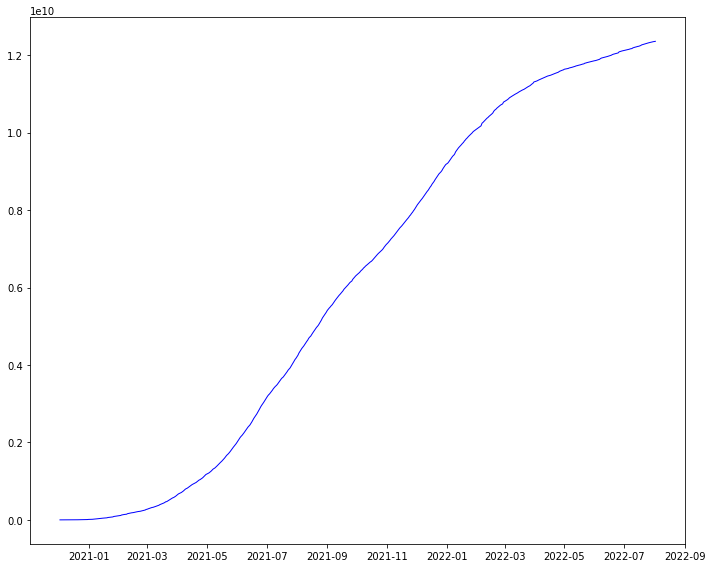

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(df_vac_wrl.date, df_vac_wrl.total_vaccinations, color="blue", lw=1.0)

plt.tight_layout()

## Porcentagem da populção vacinada

In [ ]:
# criando uma lista com os países com maior número de casos
list_top5 = df_top5_total_cases.iso_code.tolist()

# criando uma cópia do dataframe principal com somente os países
# com mais número de casos
df_top5 = df[df.iso_code.isin(list_top5)].copy()

# selecionando somente as variáveis que contem dados 
# sobre vacinação, alé disso somente o ultimo registro
# é considerado com o último dados registrado
result = []
for iso_code in list_top5:
  result.append(df_top5[df_top5.iso_code==iso_code][[ "location", "population", "people_vaccinated", "people_fully_vaccinated"]].dropna().tail(1))
df_vacc = pd.concat(result)

# dataframe com dados do último registro
df_vacc

,location,population,people_vaccinated,people_fully_vaccinated
194964,United States,3.369976e+08,2.616543e+08,223245563.0
85801,India,1.407564e+09,1.021500e+09,933235740.0
65854,France,6.742200e+07,5.452206e+07,52999310.0
26533,Brazil,2.143262e+08,1.852083e+08,170168354.0
70277,Germany,8.340855e+07,6.473427e+07,63396443.0


Métodos auxiliares para incluir novas colunas ao dataframe

In [ ]:
# calcula porcentagem de pessoas vacinadas
def percent_people_vaccinated(row) -> float:
  return (row["people_vaccinated"]*100) / row["population"]

# calcula porcentagem de pessoas que foram vacinadas com todas as doses
def percent_people_fully_vaccinated(row) -> float:  
  return (row["people_fully_vaccinated"]*100) / row["population"]

# calcula a porcentagem de pessoas que receberam pelo menos uma dose
def percent_at_least_one(row) -> float:
  return row["percent_people_vaccinated"] - row["percent_people_fully_vaccinated"]

# calcula a porcentagem de pessoas que não foram vacinadas
def not_vacc(row) -> float:
  return 100 - row["percent_people_vaccinated"]  

In [ ]:
# cria uma nova coluna no dataframe contendo a porcentagem de pessoas vacinadas
df_vacc["percent_people_vaccinated"] = df_vacc.apply(percent_people_vaccinated, axis=1)

# cria uma nova coluna no dataframe contendo a porcentagem de pessoas que foram vacinadas com todas as doses
df_vacc["percent_people_fully_vaccinated"] = df_vacc.apply(percent_people_fully_vaccinated, axis=1)

# cria uma nova coluna no dataframe contendo a porcentagem de pessoas que receberam pelo menos uma dose
df_vacc["percent_at_least_one"] = df_vacc.apply(percent_at_least_one, axis=1)

# cria uma nova coluna no dataframe contendo a porcentagem de pessoas que não foram vacinadas
df_vacc["not_vacc"] = df_vacc.apply(not_vacc, axis=1)

# ordenando dataframe por porcentagem de pessoas vacinadas em ordem decrescente 
df_vacc.sort_values(by="percent_people_vaccinated", ascending=False, inplace=True)

# imprimindo as 5 primeiras linhas
df_vacc.head()

,location,population,people_vaccinated,people_fully_vaccinated,percent_people_vaccinated,percent_people_fully_vaccinated,percent_at_least_one,not_vacc
26533,Brazil,2.143262e+08,1.852083e+08,170168354.0,86.414198,79.396889,7.017308,13.585802
65854,France,6.742200e+07,5.452206e+07,52999310.0,80.866861,78.608333,2.258528,19.133139
194964,United States,3.369976e+08,2.616543e+08,223245563.0,77.642761,66.245441,11.397320,22.357239
70277,Germany,8.340855e+07,6.473427e+07,63396443.0,77.611064,76.007124,1.603940,22.388936
85801,India,1.407564e+09,1.021500e+09,933235740.0,72.572199,66.301486,6.270713,27.427801


Para visualizarmos estes dados vamos usar uma gráfico disponível nos exemplos do matplotlib.

[Discrete distribution as horizontal bar chart](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py)

![](https://matplotlib.org/stable/_images/sphx_glr_horizontal_barchart_distribution_001.png)

Para isso precisamos transformar os nossos dados para possam ser usados neste exemplo.

Vamos fazer um gráfico onde no eixo Y serão mostrados o 5 países com maior número de casos com duas categorias, porcentagem de pessoas vacinadas no país e porcentagem de pessoas não vacinadas.

Para isso precisamos que os nossos dados estejam no formato abaixo:

```
PAÍS A = [60, 40]
PAÍS B = [80, 20]
PAÍS C = [70, 30]
PAÍS D = [40, 60]
PAÍS E = [95, 05]
```

Cada item da lista representa uma categoria, neste caso a porcentagem de pessoas vacinadas e a porcentagem de pessoas não vacinadas.



In [ ]:
# lista contendo as categorias
category_names = ["% de pessoas vacinadas", "% de pessoas não vacinadas"]

In [ ]:
# criando uma coluna combinando as procentagem de pessoas vacinadas 
# e não vacinadas em uma nova coluna chamada combine.
# Além disso os valores são arredondados para facilitar a visualização
df_vacc["combine"] = df_vacc[["percent_people_vaccinated", "not_vacc"]].round(0).values.tolist()

# verificando resultado
df_vacc.head()

,location,population,people_vaccinated,people_fully_vaccinated,percent_people_vaccinated,percent_people_fully_vaccinated,percent_at_least_one,not_vacc,combine
26533,Brazil,2.143262e+08,1.852083e+08,170168354.0,86.414198,79.396889,7.017308,13.585802,"[86.0, 14.0]"
65854,France,6.742200e+07,5.452206e+07,52999310.0,80.866861,78.608333,2.258528,19.133139,"[81.0, 19.0]"
194964,United States,3.369976e+08,2.616543e+08,223245563.0,77.642761,66.245441,11.397320,22.357239,"[78.0, 22.0]"
70277,Germany,8.340855e+07,6.473427e+07,63396443.0,77.611064,76.007124,1.603940,22.388936,"[78.0, 22.0]"
85801,India,1.407564e+09,1.021500e+09,933235740.0,72.572199,66.301486,6.270713,27.427801,"[73.0, 27.0]"


In [ ]:
# transformando o dataframe em um dicionário somente com as colunas necessárias
results = df_vacc[["location", "combine"]].set_index("location")["combine"].to_dict()                                                                  

# imprimindo o resultado
results

{'Brazil': [86.0, 14.0],
 'France': [81.0, 19.0],
 'United States': [78.0, 22.0],
 'Germany': [78.0, 22.0],
 'India': [73.0, 27.0]}

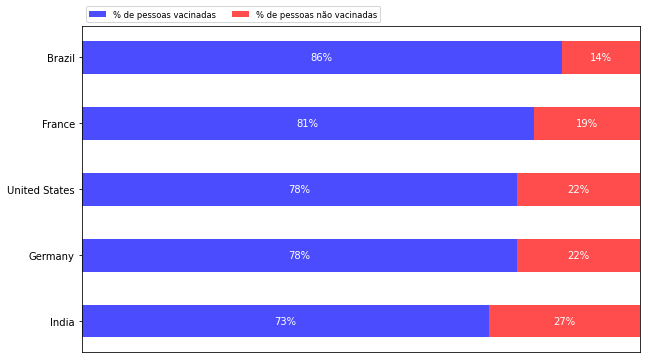

In [ ]:
labels = list(results.keys())
data = np.array(list(results.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap("bwr")(np.linspace(0.15, 0.85, data.shape[1])) 

fig, ax = plt.subplots(figsize=(10, 6))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'

    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, f"{str(int(c))}%", ha='center', va='center', color=text_color)

ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')

plt.show()

Estados Unidos que possui a posição de primeiro lugar entre os países com maior quantidade de casos ainda possui 22% de sua população ainda não vacinada.

Já o Brasil, entre o ranking dos países com maior número de casos, lidera como o país que tem a maior porcentagem da população vacinada.

## Quantidade de mortes vs Aplicação da vacina (Mundo)

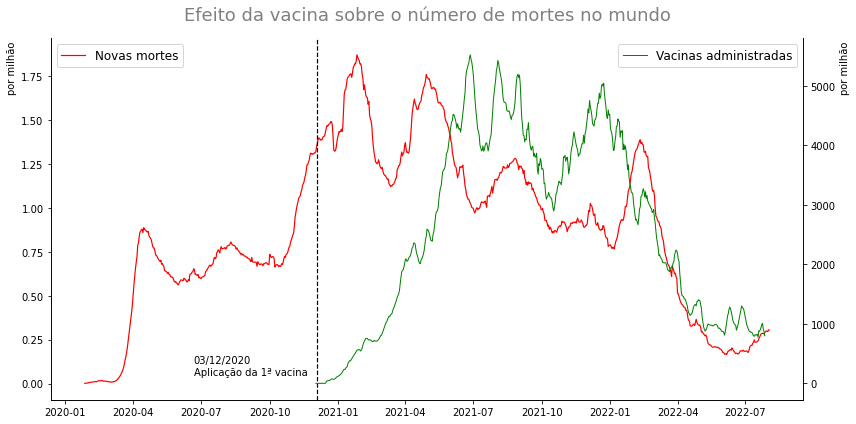

In [ ]:
# lista de iso_codes para filtro
iso_codes = ["OWID_WRL"]

# criando uma cópia do dataframe filtrado
df_wrl = df[df.iso_code.isin(iso_codes)].copy()

# instanciando objetos do gráfico
fig, ax = plt.subplots(figsize=(12,6))

# plotando dados filtrados no gráfico
ax.plot(df_wrl.date, df_wrl.new_deaths_smoothed_per_million, color="red", lw=1.2)

# criando eixo y secundário
ax2 = ax.twinx()

# plotando dados no eixo secundário do gráfico
ax2.plot(df_wrl.date, df_wrl.new_vaccinations_smoothed_per_million, color="green", lw=1)

# buscando a data da aplicação da primeira vacina
dt_primeira_vacina_mundo = df_wrl[df_wrl['new_vaccinations'].gt(0)].date.iloc[0]

# incluindo uma linha tracejada vertical no gráfico indicando a data da primeira vacina aplicada
ax.axvline(dt_primeira_vacina_mundo, color='k', ls='--', lw=1.2)

# incluindo anotação ao lado da linha tracejada vertical
ax.annotate('03/12/2020\nAplicação da 1ª vacina', xy=(dt_primeira_vacina_mundo-timedelta(days=165), 0.05))

# customizando a posição e cor da fonte dos títulos dos eixos Y 
ax.set_ylabel('por milhão', color='black', position=(0,0.92))
ax2.set_ylabel('por milhão', color='black', position=(0,0.92))

# removendo borda superior do gráfico
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# inserindo legenda
ax.legend(['Novas mortes'], loc='upper left', fontsize=12)
ax2.legend(['Vacinas administradas'], loc='upper right', fontsize=12)

ax.set_title("Efeito da vacina sobre o número de mortes no mundo", fontsize=18, pad=18, color="grey")

plt.tight_layout()

Apesar de termos eventuais picos no número de mortes, é possivel ver uma redução significativa nos casos de morte com a aplicação da vacina.

# Conclusões



Este projeto apresentou uma análise de dados sobre o COVID-19 disponibilizada e mantido pelo site [Our World in Data](https://ourworldindata.org/). Além disso, toda a análise dos dados foi feita com o objetivo de explorar e estudar o potencial da biblioteca [matplotlib](https://matplotlib.org/) visualizando os dados através dos mais variados tipos de gráficos e explorando toda sua flexibilidade na customização de seus gráficos.

Sob o ponto de vista dos dados,  podemos concluir que:


1.   Desde a detecção do vírus, o crescimento de casos foi a uma velocidade muito grande, onde, em questões de meses quantidades na casa dos milhões foram detectadas em casos confirmados no mundo inteiro;
2.   A novas variantes do vírus contribuio para prolongar a pandemia causando o aumento de casos repentido mesmo após um longo tempo da descoberta do vírus;
3.   O paíse com maior quantidade de casos confirmado é o Estados Unidados, o Brasil é o terceiro colocado entre os TOP5 países com a maior quantidade de casos confirmados;
4.   A Corréia do Norte é o páis com a menor quantidade de casos registrada, este dado provavelmente é duvidoso pois conforme pesquisas realizadas foi identificado que o pais não está sendo muito transparente na divulgação de seus números em relação o Coronavirus;
5.   A quantidade de casos está diretamente relacionada a quantidade de mortos, ou seja, com o aumento de casos tem-se um reflexo no aumento dos casos de morte;
6.   Desde Abril de 2022 percebe-se uma diminuição no aumento da quantidade de morte mesmo com com o aumento da quantidade de casos;
7.   A quantidade de mortes vem tendo um tendência de baixa desde Janeiro 2022;
8.   O Estados Unidos é o país com a maior quantidade de mortes, o Brasil ocupa o segundo lugar entre os TOP5 países com a maior quantidade de mortes;
9.   Países de renda alta possui uma maior quantidade de casos confirmados se compararmos com com paises de baixa, média e média alta;
10.  Países de baixa renda possui e menor quantidade de casos confirmados, isto pode ser devido a condições limitadas em realizar testes com a população;
11.  A taxa de reprodução do vírus foi elevada no início da pandemia e com o passar do tempo teve uma queda brusca e se mantem numa constante até o momento;
12.  No Brasil, a variante Omicron provavelmente provocou o aumento significativo no aumento da taca de reprodução em Janeiro de 2022;
13.  Os países TOP5 com maior quantidade de casos tem mais do que 70% de sua população com pelo menos uma dose da vacina. O Brasil tem 86% da população vacinada.
14.  Com a aplicação da vacina a quantidade de mortes vem tendo uma tendência de baixa mostrando o efeito positivo da vacina sobre o vírus.


